# Matplotlib 

## Create a dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set seed for reproducibility
np.random.seed(0)
# Generate dates
date_range = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
# Generate temperature data (in °C)
temperatures = np.random.normal(loc=15, scale=10, size=len(date_range))
# Generate sales data (in USD)
sales = np.random.normal(loc=200, scale=50, size=len(date_range))
# Generate categorical data for sales categories
categories = np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Furniture'], size=len(date_range))

# Create a DataFrame
a = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperatures,
    'Sales': sales,
    'Category': categories
})

In [3]:
import matplotlib.pyplot as plt

## Line Plot
In general Line Plot are used for Trend analysis <br>
Where the Time is always at the x-axis and Values are at the y-axis

### Simple Line Plot

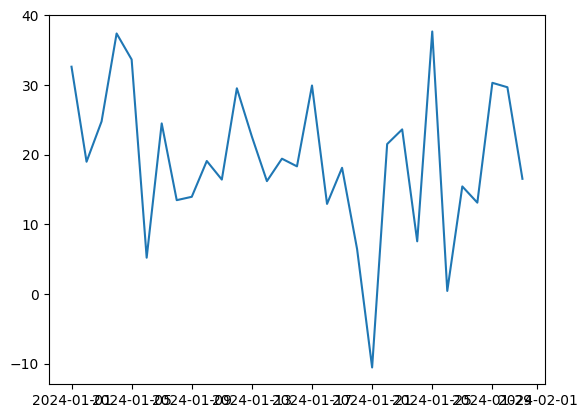

In [4]:
plt.plot(a['Date'],a['Temperature']);

### Labeling and Titling
Add plt.figure() To make a proper Layout<br>
Add Titles "plt.title()",<br>
Add Labels "plt.xlabel(),plt.ylabel"<br>
plt.show(); to display

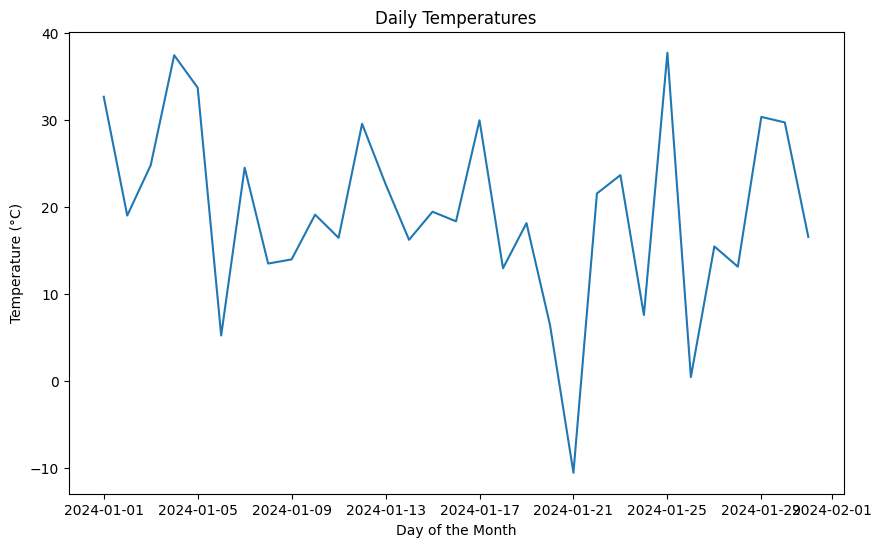

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(a['Date'], a['Temperature'])
plt.title('Daily Temperatures')
plt.xlabel('Day of the Month')
plt.ylabel('Temperature (°C)')
plt.show();

### Adding Grids 
Adding plt.figure,title and labels made the plot way better.<br>
Now we can manipulate the colors,style ,grid and marking to make it look good.<br>

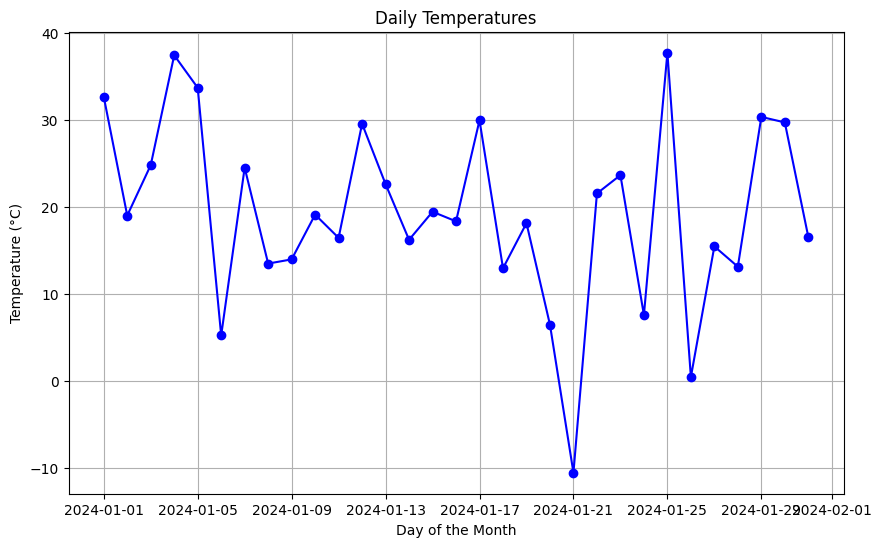

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(a['Date'], a['Temperature'], marker='o', linestyle='-', color='b')
plt.title('Daily Temperatures')
plt.xlabel('Day of the Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

## Scatter Plot
In general Scatter Plot are used for correlation of two numerical variables

### Simple Scatter Plot

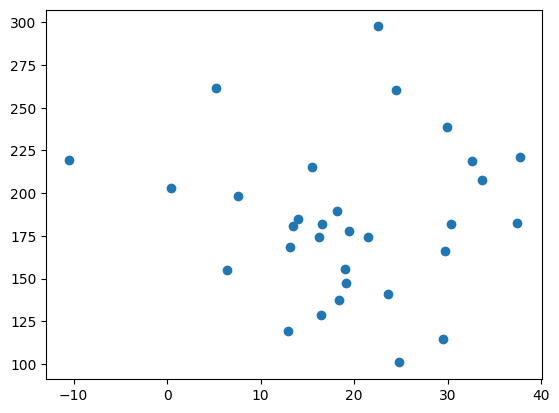

In [7]:
plt.scatter(a['Temperature'], a['Sales']);

### Better Scatter Plot
Adding up plt.Figure , Titles , Lables, Grid

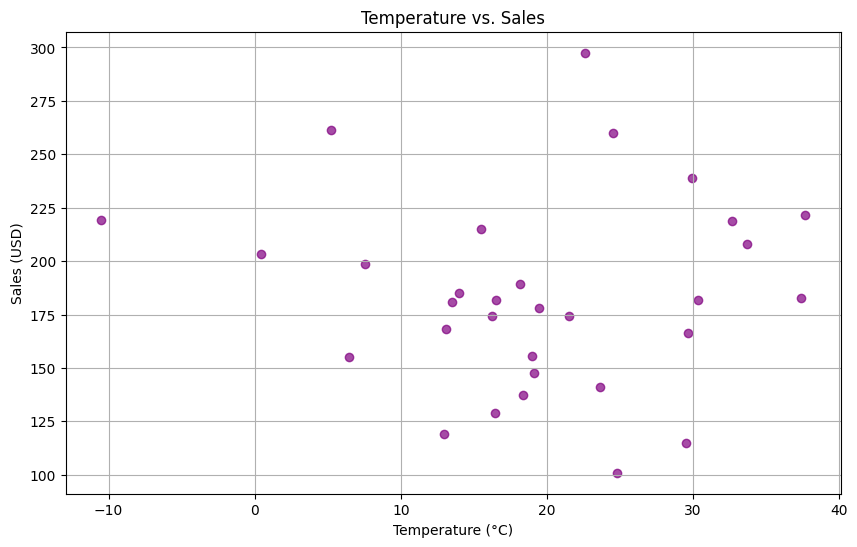

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(a['Temperature'], a['Sales'], c='purple', alpha=0.7)
plt.title('Temperature vs. Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show();

## Histogram
Histogram in general is used for showing the distribution of the data . In General Numerical variable is used

### Simple Histogram

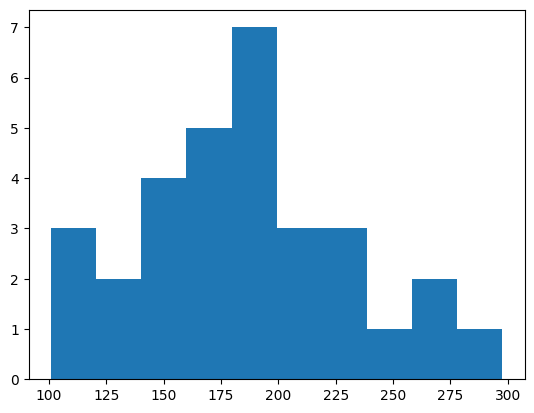

In [9]:
plt.hist(a['Sales']);

### Better Histogram

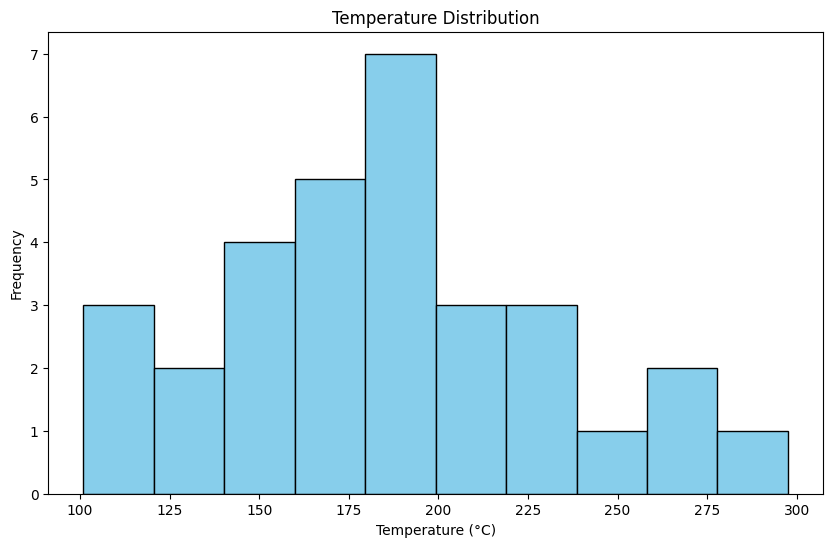

In [10]:
plt.figure(figsize=(10,6))
plt.hist(a['Sales'],bins=10, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show();

## Bar Plot
In General Bar Plots are used for comparing Categorical Column.
Catogories are in X Axis and Values are in Y axis and can be changes for horizontal Representation.

### Simple Bar plot

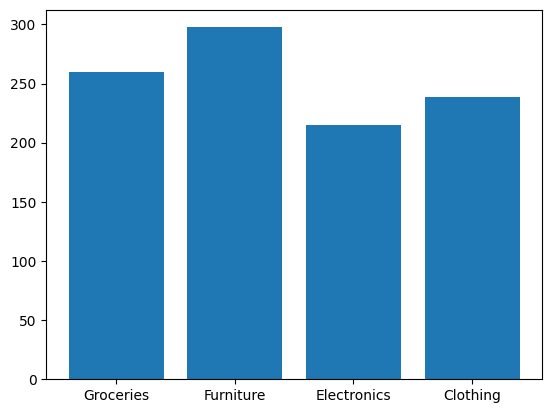

In [11]:
plt.bar(a['Category'],a['Sales']);
#This Plots the Max value in the category.

### Better Bar plot

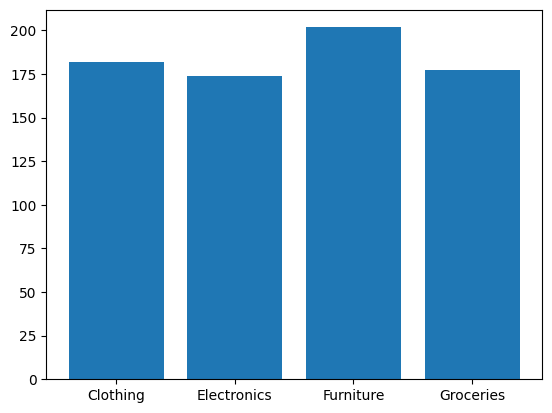

In [12]:
# To make the bar chart more customizable we need to set the height
# If we have to plot the mean we need to groupby the category to mean and etc..
plt.bar(a.groupby('Category')['Sales'].mean().index,a.groupby('Category')['Sales'].mean().values);

In [13]:
# We can make it look by assigning it into variables
bi  =   a.groupby('Category')['Sales'].mean().index     # Bar Index
bv  =   a.groupby('Category')['Sales'].mean().values    # Bar Values
print(bi,"\n",bv)

Index(['Clothing', 'Electronics', 'Furniture', 'Groceries'], dtype='object', name='Category') 
 [181.98996862 173.6082667  201.82980472 177.09857042]


### Way better Bar Chart
Adding layout, titles, labels, and grid ,<br>
xticks - Change the rotation of x labels can be (changed to y labels too)


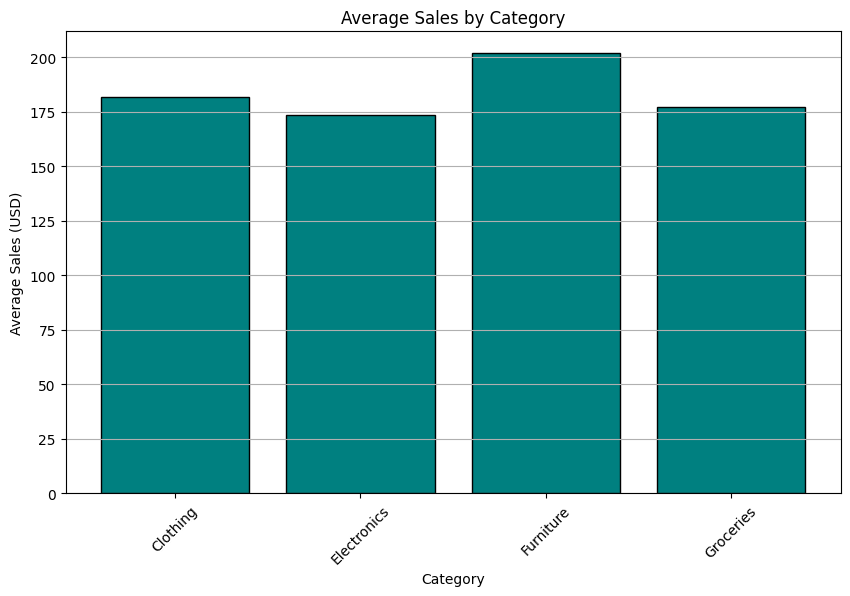

In [14]:
plt.figure(figsize=(10,6))
plt.bar(bi,bv,color='teal', edgecolor='black')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Horizontal Bar chart
Adding one letter changes the whole vertical bars to horizontal
Also Make sure of x and y labels

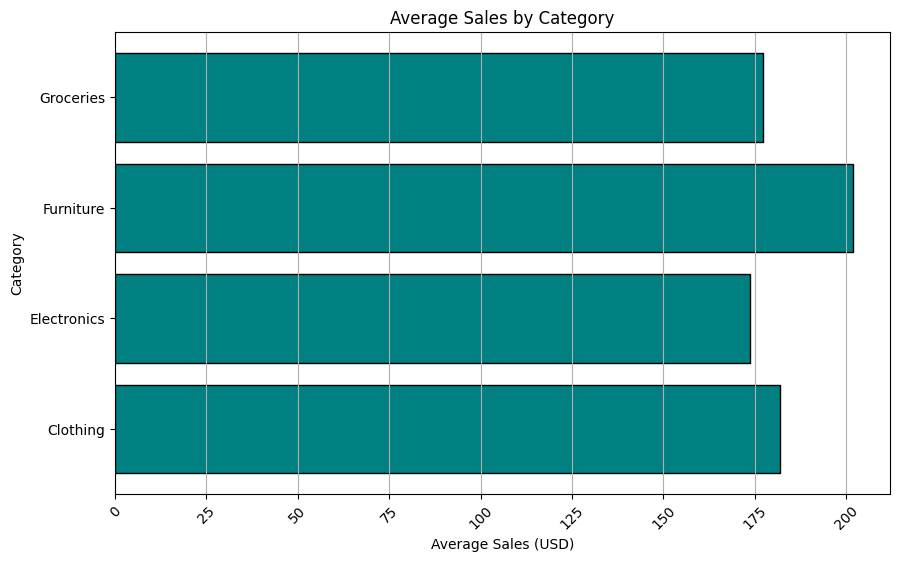

In [15]:
plt.figure(figsize=(10,6))
plt.barh(bi,bv,color='teal', edgecolor='black')
plt.title('Average Sales by Category')
plt.ylabel('Category')
plt.xlabel('Average Sales (USD)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

## Box Plot 
In general box plot is used to visualize the spread of the numerical data through their quartiles.<br> 
The plot is also called the box-and-whisker plot.<br><br>
Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot.

### Simple Box Plot

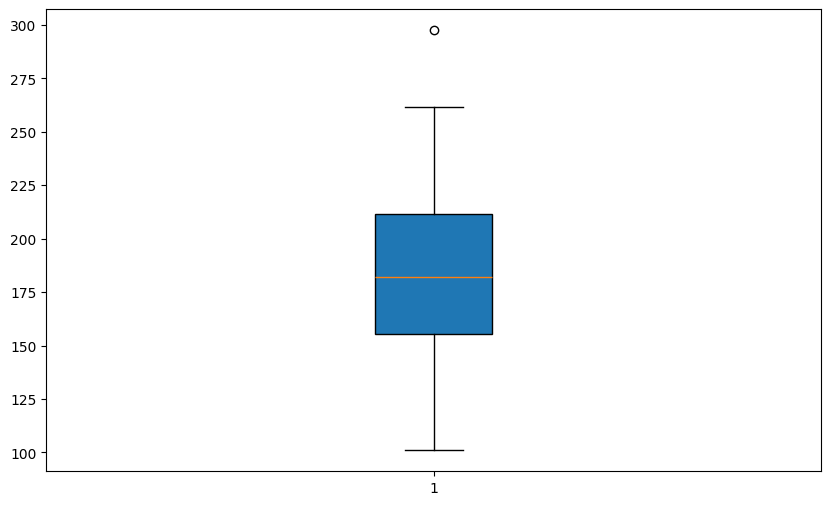

In [16]:
plt.figure(figsize=(10, 6));
plt.boxplot(x=a['Sales'],patch_artist=True);

<Figure size 1000x600 with 0 Axes>

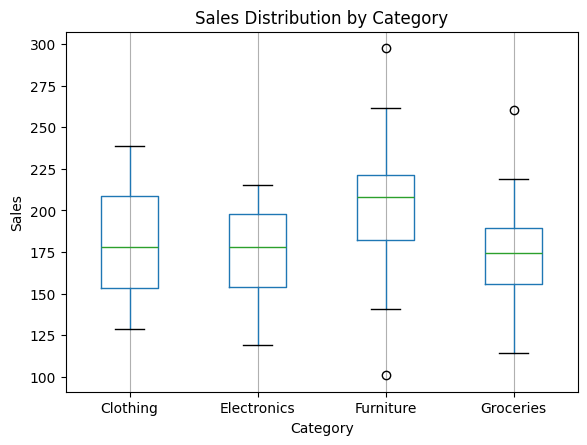

In [17]:
plt.figure(figsize=(10, 6))
a.boxplot(column='Sales',by='Category');
plt.title('Sales Distribution by Category')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show();

## Pie Chart
In general Pie Charts are used for visualisation of the proportion of the category

### Simple pie Chart

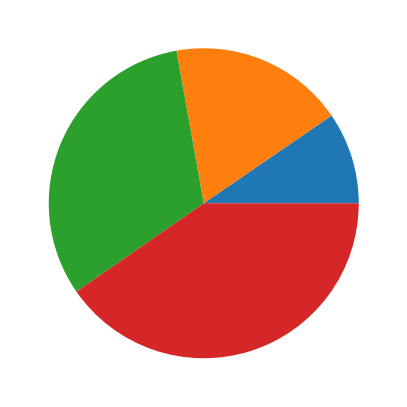

In [18]:
plt.figure(figsize=(5,6))
plt.pie(a.groupby(['Category'])['Sales'].sum());

### Better Pie
If we plot using pandas pie plot we get auto labeling

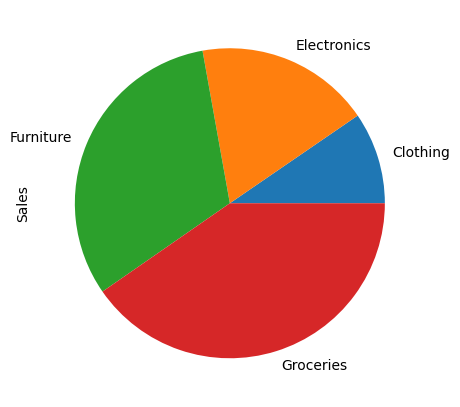

In [19]:
plt.figure(figsize=(5,6))
a.groupby(['Category'])['Sales'].sum().plot.pie();

### Even Better pie plot
We can customize the pie plots by adding percentage , colors, etc..

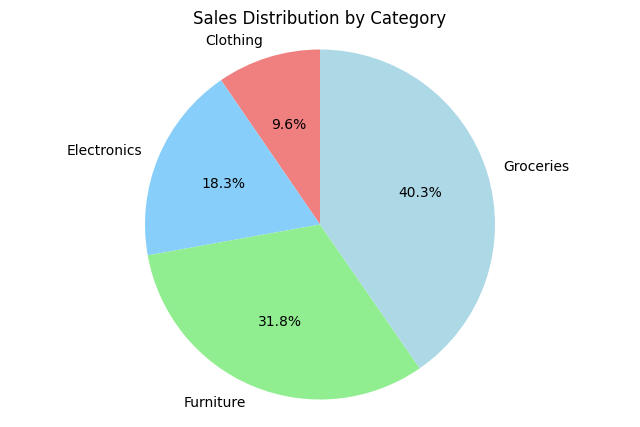

In [20]:
plt.figure(figsize=(8, 5))
plt.pie(a.groupby('Category')['Sales'].sum(), labels=a.groupby('Category')['Sales'].sum().index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen','lightblue'])
plt.title('Sales Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Donut Chart 
aka Concentric Pie chart 

<Figure size 800x500 with 0 Axes>

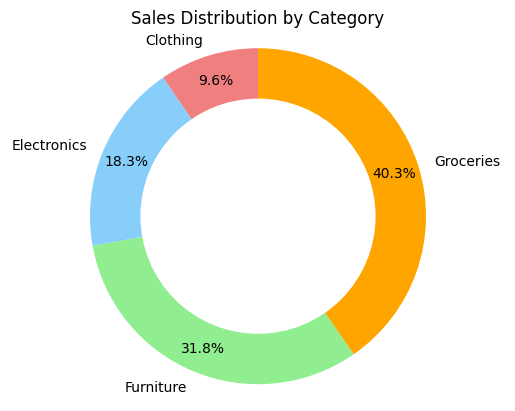

In [21]:
catgroup=a.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 5))
fig, ax = plt.subplots()

ax.pie(catgroup, labels=catgroup.index , autopct='%1.1f%%',pctdistance=0.85, startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen','orange'])
plt.title('Sales Distribution by Category')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show();

## Bonus Plots

## Step Plot 

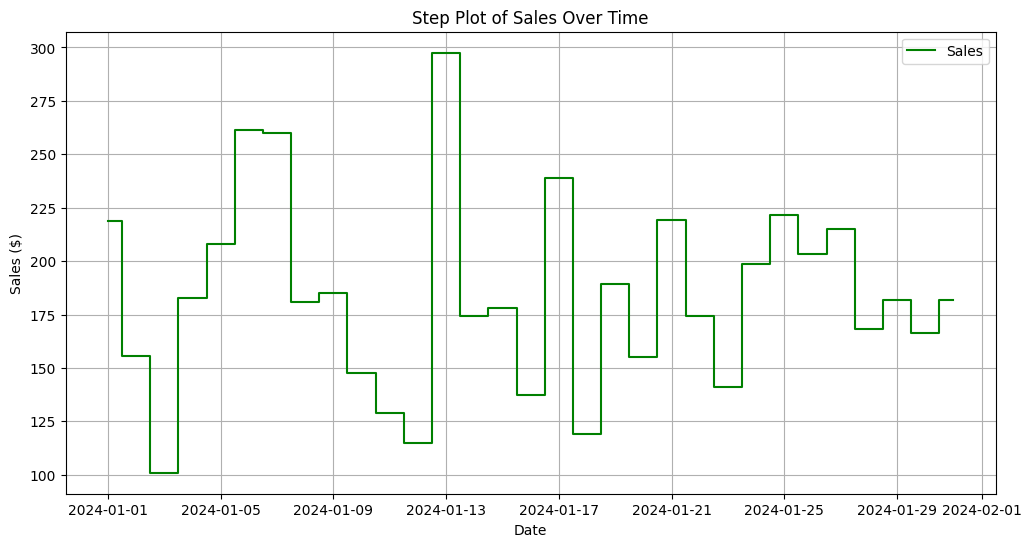

In [22]:
plt.figure(figsize=(12,6))
plt.step(a['Date'], a['Sales'], where='mid', label='Sales', color='green');
plt.title('Step Plot of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid()
plt.show()

### Area Plots

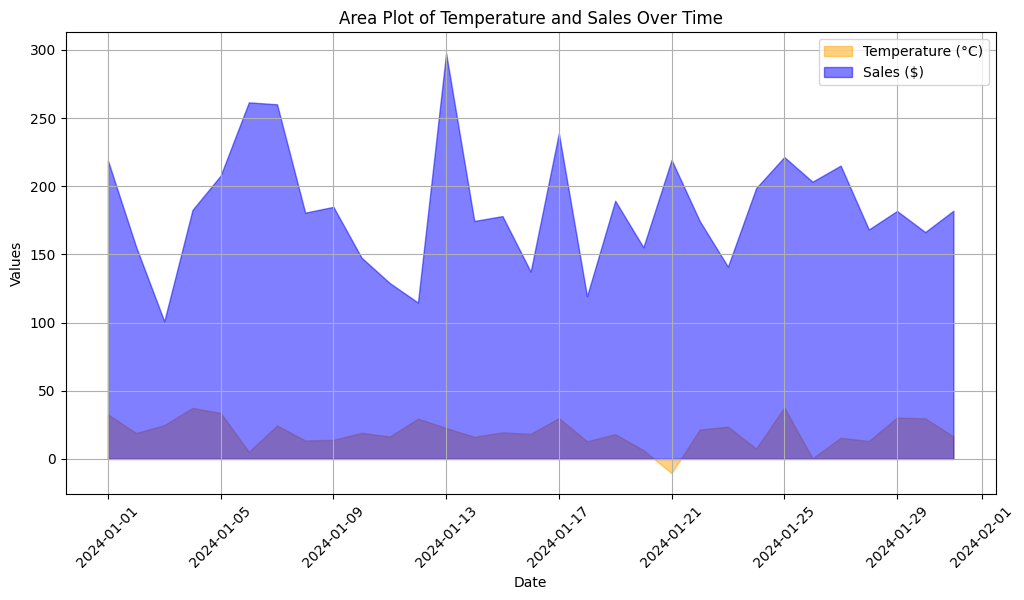

In [23]:
plt.figure(figsize=(12, 6))
plt.fill_between(a['Date'], a['Temperature'], color='orange', alpha=0.5, label='Temperature (°C)')
plt.fill_between(a['Date'], a['Sales'], color='blue', alpha=0.5, label='Sales ($)')
plt.title('Area Plot of Temperature and Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

I hope you found this information helpful! <br>
Feel free to save this post for future reference.<br>
Let's continue to learn and grow together! <br>
<br>

[Rajendra Prasad](http://chlorinexxe.github.io/portfolio)
